In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 500)

In [6]:
data = pd.read_csv('data_set.csv', delimiter=';')

In [7]:
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,0,1,220,18.0,0,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,0,1,137,97.0,1,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,0,1,251,84.0,0,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,0,36,168.0,1,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,0,1,83,101.0,1,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  int64  
 1   TARGET                      15223 non-null  int64  
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  int64  
 4   SOCSTATUS_PENS_FL           15223 non-null  int64  
 5   GENDER                      15223 non-null  int64  
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

Предобработка #1


Теперь сделаем простую предварительную обработку данных, а именно:

Удалим «тяжелые» признаки ['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'MARITAL_STATUS', 'ORG_TP_FCAPITAL', 'REGION_NM', 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE']
Заменим запятые на точки в представлении чисел в признаках ['LOAN_AVG_DLQ_AMT', 'LOAN_AVG_DLQ_AMT']

In [9]:
def preproc(df_input):
    drop_cols = ['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'GEN_INDUSTRY', 
                 'GEN_TITLE', 'JOB_DIR', 'MARITAL_STATUS', 'ORG_TP_FCAPITAL', 'REGION_NM', 
                 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 
                 'AGREEMENT_RK']

    # Make a copy of data
    df_temp = df_input.copy()

    # Drop the hard columns
    df_temp = df_temp.drop(drop_cols, axis=1)

    digit_cols = ['LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'CREDIT', 'FST_PAYMENT', 'PERSONAL_INCOME']
    df_temp[digit_cols] = df_temp[digit_cols].replace(regex={',': '.'}).astype('float64')

    return df_temp

In [11]:
data_preproc = preproc(data)
data_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TARGET                      15223 non-null  int64  
 1   AGE                         15223 non-null  int64  
 2   SOCSTATUS_WORK_FL           15223 non-null  int64  
 3   SOCSTATUS_PENS_FL           15223 non-null  int64  
 4   GENDER                      15223 non-null  int64  
 5   CHILD_TOTAL                 15223 non-null  int64  
 6   DEPENDANTS                  15223 non-null  int64  
 7   PERSONAL_INCOME             15223 non-null  float64
 8   REG_FACT_FL                 15223 non-null  int64  
 9   FACT_POST_FL                15223 non-null  int64  
 10  REG_POST_FL                 15223 non-null  int64  
 11  REG_FACT_POST_FL            15223 non-null  int64  
 12  REG_FACT_POST_TP_FL         15223 non-null  int64  
 13  FL_PRESENCE_FL              152

Train / Test Split

In [12]:
label_col = data_preproc.columns == 'TARGET'

# Take all columns that are not TARGET
X = data_preproc.loc[:, ~label_col].values #

# Take TARGET column
y = data_preproc.loc[:, label_col].values.flatten()

In [13]:
X[:2]

array([[4.900e+01, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        5.000e+03, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 8.000e+03, 6.000e+00, 8.650e+03, 0.000e+00, 1.000e+00,
        2.200e+02, 1.800e+01, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 1.580e+03, 1.580e+03,
              nan],
       [3.200e+01, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        1.200e+04, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.165e+04, 6.000e+00, 4.000e+03, 0.000e+00, 1.000e+00,
        1.370e+02, 9.700e+01, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 4.020e+03, 4.020e+03,
              nan]])

In [14]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
from sklearn.model_selection import train_test_split

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Предобработка #2

Замените пропущенные значения средними значениями признаков. Для этого нужно рассчитать средние значения для каждого входного признака, используя выборку train.

In [17]:
# Import imputer
from sklearn.impute import SimpleImputer

# Create object of the class and set up its parameters
imp = SimpleImputer(strategy='mean'); imp.fit(X_train)

# Calculate mean values for each feature
imp.fit(X_train)

# Replace missing values in train and test samples
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

Масштабируйте входные данные с помощью StandardScaler: $$ X_{new} = \frac{X - \mu}{\sigma} $$

In [18]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create object of the class and set up its parameters
ss = StandardScaler()

# Estimate mean and sigma values
ss.fit(X_train)

# Scale train and test samples
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

Обучение классификаторов

Cравним три классификатора:

KNN
Логистическая регрессия
Древо решений
Будем использовать scikit-learn реализацию этих классификаторов. Их описания: kNN, Decision Tree, Logistic Regression.

In [19]:
# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Create object of the classifier's class
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create object of the classifier's class
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=10, class_weight=None)

# Fit the classifier
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Create object of the classifier's class
logreg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, class_weight=None)

# Fit the classifier
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Прогнозы

Сделаем прогноз метки классов.

In [22]:
# kNN
y_test_knn = knn.predict(X_test)

# Decision Tree
y_test_dt = dt.predict(X_test)

# Logistic Regression
y_test_logreg = logreg.predict(X_test)

In [23]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_knn[:10])
print("DT     : ", y_test_dt[:10])
print("LogReg : ", y_test_logreg[:10])

Truth  :  [0 0 0 1 0 0 0 0 0 0]
kNN    :  [0 0 0 0 0 0 0 0 0 0]
DT     :  [0 0 0 0 0 0 0 0 0 0]
LogReg :  [0 0 0 0 0 0 0 0 0 0]


Сделаем прогноз вероятности положительного ответа клиентов.

In [27]:
# kNN
y_test_proba_knn = knn.predict_proba(X_test)[:, 1]

# Decision Tree
y_test_proba_dt = dt.predict_proba(X_test)[:, 1]

# Logistic Regression
y_test_proba_logreg = logreg.predict_proba(X_test)[:, 1]

In [28]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_proba_knn[:10])
print("DT     : ", y_test_proba_dt[:10])
print("LogReg : ", y_test_proba_logreg[:10])

Truth  :  [0 0 0 1 0 0 0 0 0 0]
kNN    :  [0.4 0.2 0.4 0.2 0.  0.2 0.  0.  0.  0. ]
DT     :  [0.         0.41666667 0.         0.         0.33333333 0.
 0.         0.         0.         0.        ]
LogReg :  [0.27965285 0.09024239 0.21916527 0.17603784 0.1414036  0.09882763
 0.08216641 0.12860752 0.16322412 0.08185794]


Метрики качества для прогнозов меток

Матрица ошибок:



TP (true positive) - currectly predicted positives
FP (false positive) - incorrectly predicted negatives (1st order error)
FN (false negative) - incorrectly predicted positives (2nd order error)
TN (true negative) - currectly predicted negatives
Pos (Neg) - total number of positives (negatives)

Quality metrics:

$ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$
$ \text{Error rate} = 1 -\text{accuracy}$
$ \text{Precision} =\frac{TP}{TP + FP}$
$ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$
$ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):
    
    tp = np.sum( (y_true == 1) * (y_pred == 1) )
    fp = np.sum( (y_true == 0) * (y_pred == 1) )
    fn = np.sum( (y_true == 1) * (y_pred == 0) )
    tn = np.sum( (y_true == 0) * (y_pred == 0) )
    
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [30]:
metrics_report = pd.DataFrame(columns=['TP', 'FP', 'FN', 'TN', 'Accuracy', 'Error rate', 'Precision', 'Recall', 'F1'])

metrics_report.loc['kNN', :] = quality_metrics_report(y_test, y_test_knn)
metrics_report.loc['DT', :] = quality_metrics_report(y_test, y_test_dt)
metrics_report.loc['LogReg', :] = quality_metrics_report(y_test, y_test_logreg)

metrics_report

,TP,FP,FN,TN,Accuracy,Error rate,Precision,Recall,F1
kNN,23,70,532,3942,0.868185,0.131815,0.247312,0.041441,0.070988
DT,45,211,510,3801,0.842128,0.157872,0.175781,0.081081,0.110974
LogReg,1,3,554,4009,0.878038,0.121962,0.25,0.001802,0.003578


Метрики качества на основе вероятностей

ROC кривая
ROC кривая измеряет насколько хорошо классификатор разделяет два класса.

Пусть 
y
i
 - истинная метрка и 
y
^
i
 - прогноз вероятности для 
i
-го объекта.

Число положительных и отрицательных объектов: $\mathcal{I}{\rm 1} = {i: y{\rm i}=1}$ and $\mathcal{I}{\rm 0} = {i: y{\rm i}=0}$.

Для каждого порогового значения вероятности 
τ
 считаем True Positive Rate (TPR) и False Positive Rate (FPR):

\begin{equation} TPR(\tau) = \frac{1}{I_{\rm 1}} \sum_{i \in \mathcal{I}{\rm 1}} I[\hat{y}{\rm i} \ge \tau] \end{equation}

\begin{equation} FPR(\tau) = \frac{1}{I_{\rm 0}} \sum_{i \in \mathcal{I}{\rm 0}} I[\hat{y}{\rm i} \ge \tau] \end{equation}

In [33]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_proba_knn)
auc_logreg = auc(fpr_logreg, tpr_logreg)

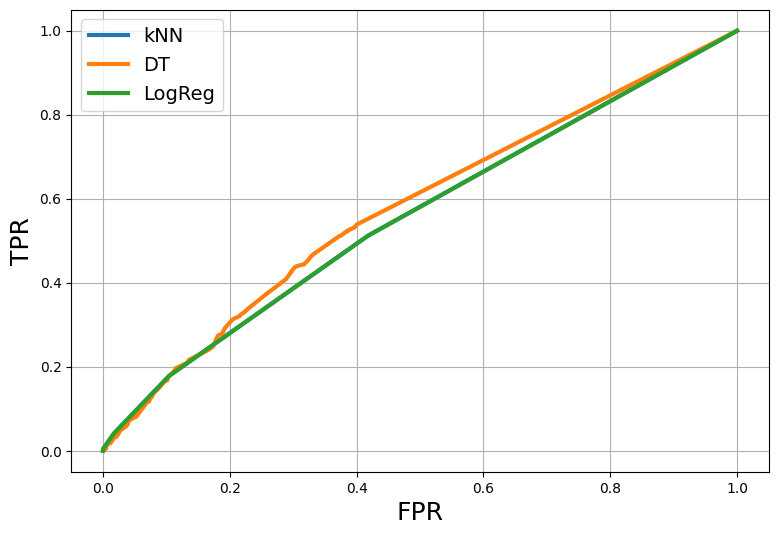

kNN ROC AUC    : 0.5581597549693262
DT ROC AUC     : 0.5778594396989213
LogReg ROC AUC : 0.5581597549693262


In [34]:
plt.figure(figsize=(9, 6))
plt.plot(fpr_knn, tpr_knn, linewidth=3, label='kNN')
plt.plot(fpr_dt, tpr_dt, linewidth=3, label='DT')
plt.plot(fpr_logreg, tpr_logreg, linewidth=3, label='LogReg')

plt.xlabel('FPR', size=18)
plt.ylabel('TPR', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

print('kNN ROC AUC    :', auc_knn)
print('DT ROC AUC     :', auc_dt)
print('LogReg ROC AUC :', auc_logreg)

Precision-Recall curve
Аналогично ROC кривой.

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_test_proba_knn)
ap_knn = average_precision_score(y_test, y_test_proba_knn)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_test_proba_dt)
ap_dt = average_precision_score(y_test, y_test_proba_dt)

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_test_proba_logreg)
ap_logreg = average_precision_score(y_test, y_test_proba_logreg)

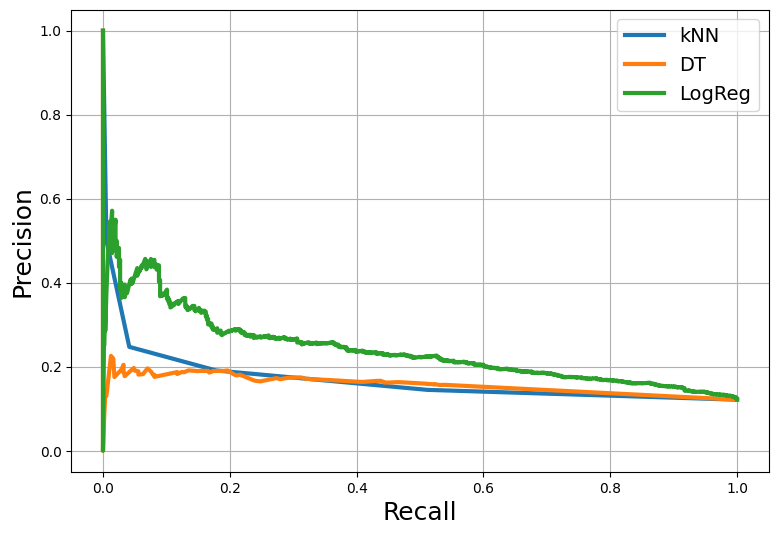

kNN AP    : 0.14542423986420286
DT AP     : 0.15034153454796287
LogReg AP : 0.23990750261891974


In [36]:
plt.figure(figsize=(9, 6))
plt.plot(recall_knn, precision_knn, linewidth=3, label='kNN')
plt.plot(recall_dt, precision_dt, linewidth=3, label='DT')
plt.plot(recall_logreg, precision_logreg, linewidth=3, label='LogReg')

plt.xlabel('Recall', size=18)
plt.ylabel('Precision', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

print('kNN AP    :', ap_knn)
print('DT AP     :', ap_dt)
print('LogReg AP :', ap_logreg)

Вопросы:

Какой классификатор лучше?
Как можно улучшить качество моделей?